In [92]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

# Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [93]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [94]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


 # Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

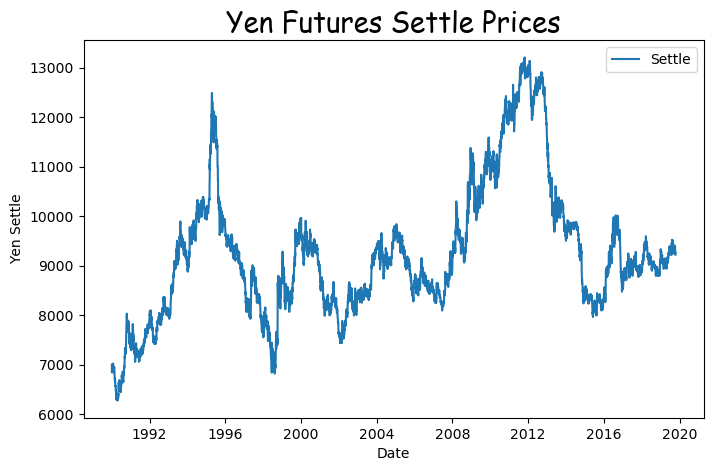

In [95]:
# Plot just the "Settle" column from the dataframe:
# YOUR CODE HERE!
y =yen_futures.Settle
plt.figure(figsize=(8,5), dpi=100)
#x = yen_futures.Date
plt.plot(y, label='Settle')
plt.title('Yen Futures Settle Prices', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('Date')
plt.ylabel('Yen Settle')
# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [96]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:
yen_futures_noise, yen_futures_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])

yen_noise=yen_futures_noise
yen_trend=yen_futures_trend
yen_trend.head()

Date
1990-01-02    6908.503967
1990-01-03    6908.799756
1990-01-04    6909.057104
1990-01-05    6909.223948
1990-01-08    6909.310062
Name: Settle_trend, dtype: float64

Text(0.5, 1.0, 'Settle Trend For The Whole DataSet')

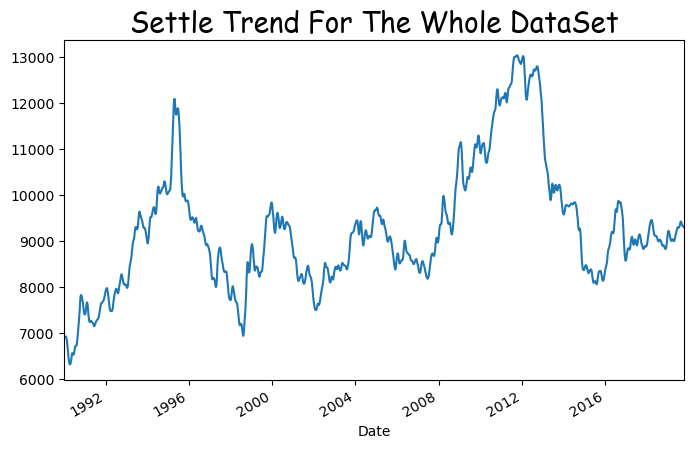

In [97]:
plt.figure(figsize=(8,5), dpi=100)
yen_trend.plot()
plt.title('Settle Trend For The Whole DataSet', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

In [98]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:
yen_settle_price =yen_futures["Settle"]
yen_settle_price = pd.concat([yen_settle_price, yen_noise,yen_trend], axis=1)
yen_settle_price.columns =['Settle','Noise','Trend']
yen_settle_price.head()

,Settle,Noise,Trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


In [99]:
# Plot the Settle Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
yen_settle_price_2015 = yen_settle_price['2015':]
yen_settle_price_2015.head()


,Settle,Noise,Trend
Date,,,
2015-01-02,8315.0,-79.686404,8394.686404
2015-01-05,8371.0,-30.395762,8401.395762
2015-01-06,8435.0,26.414403,8408.585597
2015-01-07,8412.0,-4.089059,8416.089059
2015-01-08,8360.0,-63.755805,8423.755805


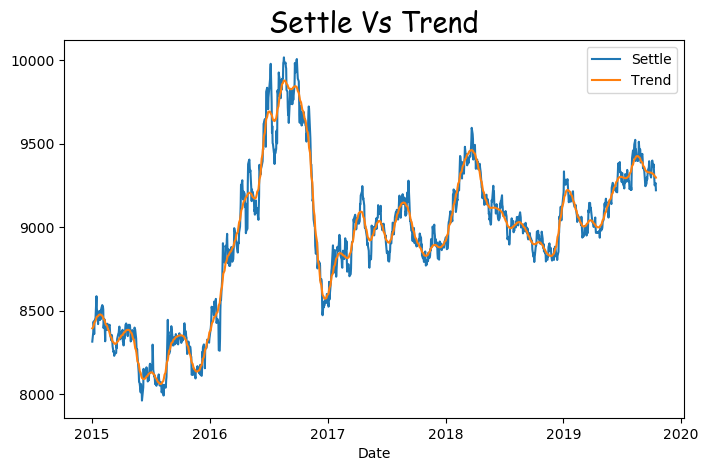

In [100]:
# Plot the Settle Noise
# YOUR CODE HERE!
plt.figure(figsize=(8,5), dpi=100)
plt.plot(yen_settle_price_2015['Settle'], label='Settle')
plt.plot(yen_settle_price_2015['Trend'], label='Trend')
plt.title('Settle Vs Trend', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('Date')
# Add a legend
plt.legend()
# Show plot
plt.show()
#plt.ylabel('Yen Settle')

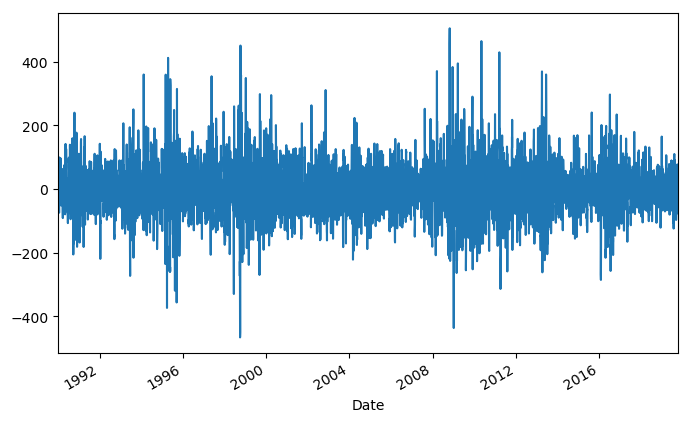

In [101]:
plt.figure(figsize=(8,5), dpi=100)
yen_noise.plot()

---

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [102]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


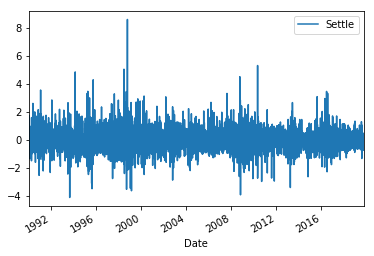

In [103]:
returns.plot()

In [104]:
# TO test for stationarity
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(returns)


(-87.6773623853942,
 0.0,
 0,
 7513,
 {'1%': -3.4312206955500963,
  '5%': -2.8619247816139843,
  '10%': -2.5669748148389813},
 15724.766827334091)

In [107]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
ARMA_model = ARMA(returns.values, order=(2,1))
# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results = ARMA_model.fit()

In [108]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sun, 28 Feb 2021   AIC                          15798.142
Time:                        05:08:56   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3062      1.277     -0.240      0.811      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2946      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3352           +0.0000j            3.3352            0.5000
AR.2         -157.2096           +0.0000j          157.2096            0.5000
MA.1           -3.3941           +0.0000j            3.3941            0.5000
-----------------------------------------------------------------------------
"""

<Figure size 1500x1500 with 0 Axes>

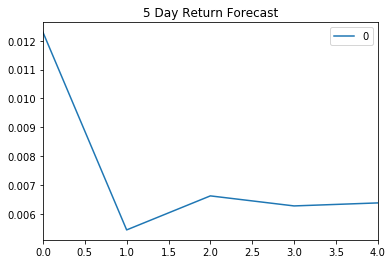

In [116]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
# Plot the forecasted return for the next 10 days
plt.figure(figsize=(15,15), dpi=100)
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Return Forecast")

---

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [141]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
from statsmodels.tsa.arima_model import ARIMA
ARIMA_model = ARIMA(returns.Settle.values, order=(5, 1, 1))

# Fit the model
ARIMA_results = ARIMA_model.fit()

C:\Users\akinnubisa\Anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [142]:
# Output model summary results:
ARIMA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7513
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7895.631
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sun, 28 Feb 2021   AIC                          15807.261
Time:                        06:18:47   BIC                          15862.656
Sample:                             1   HQIC                         15826.282
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.222e-06   3.67e-06     -0.877      0.380   -1.04e-05    3.98e-06
ar.L1.D.y     -0.0117      0.012     -1.015      0.310      -0.034       0.011
ar.L2.D.y     -0.0003      0.012     -0.029      0.977      -0.023       0.022
ar.L3.D.y     -0.0128      0.012     -1.109      0.268      -0.035       0.010
ar.L4.D.y     -0.0192      0.012     -1.663      0.096      -0.042       0.003
ar.L5.D.y     -0.0021      0.012     -0.180      0.857      -0.025       0.021
ma.L1.D.y     -0.9999      0.000  -2278.649      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7531           -1.7716j            2.4924           -0.1258
AR.2            1.7531           +1.7716j            2.4924            0.1258
AR.3           -2.0702           -2.1726j            3.0010           -0.3712
AR.4           -2.0702           +2.1726j            3.0010            0.3712
AR.5           -8.5913           -0.0000j            8.5913           -0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

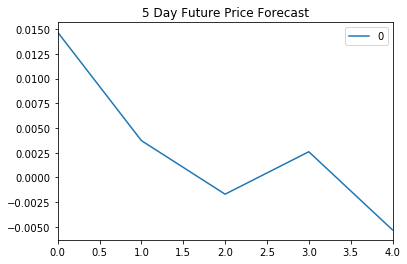

In [143]:
# Plot the 5 Day Price Forecast
# Visualize the forecast
pd.DataFrame(ARIMA_results.forecast(steps=5)[0]).plot(title="5 Day Future Price Forecast")

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [148]:
from arch import arch_model

In [151]:
# Estimate a GARCH model:
# YOUR CODE HERE!
ARCH_model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
# Fit the model
# YOUR CODE HERE!
res = ARCH_model.fit(disp="off")

In [152]:
# Summarize the model results
# YOUR CODE HERE!
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Sun, Feb 28 2021   Df Residuals:                     7514
Time:                        06:24:29   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [155]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [160]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = res.forecast(start=last_day, horizon=forecast_horizon)

In [161]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [162]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15 00:00:00
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


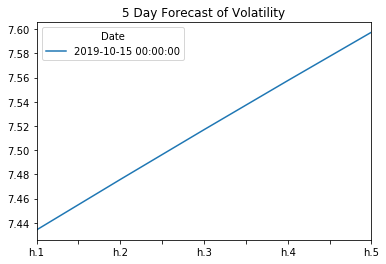

In [163]:
# Plot the final forecast
# Plot the final forecast
final.plot(title="5 Day Forecast of Volatility")

---

# Conclusions

Based on your time series analysis, would you buy the yen now?

Is the risk of the yen expected to increase or decrease?

Based on the model evaluation, would you feel confident in using these models for trading?